## Importation des modules 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.covariance import empirical_covariance
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import scale
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

## Préparation des données d'entraînements

### Teams

On importe les données :

In [3]:
train_home_team_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_away_team_statistics_df.csv', index_col=0)

On retire les 2 premières colonnes (id et league) :

In [4]:
train_home_team = train_home_team_statistics_df.iloc[:,2:]
train_away_team = train_away_team_statistics_df.iloc[:,2:]

On impute les données manquantes : 

In [5]:
train_home_team = train_home_team.replace({np.inf:np.nan,-np.inf:np.nan})

imputer = KNNImputer(n_neighbors=10)

train_home_team_nor = scale(train_home_team, axis = 0)

train_home_team_imp = pd.DataFrame(
    imputer.fit_transform(train_home_team_nor),  # Imputation
    columns=train_home_team.columns,            # Conserver les noms des colonnes
    index=train_home_team.index                 # Conserver l'index
)

In [6]:
train_away_team = train_away_team.replace({np.inf:np.nan,-np.inf:np.nan})

train_away_team_nor = scale(train_away_team, axis = 0)

train_away_team_nor_imp = pd.DataFrame(
    imputer.fit_transform(train_away_team_nor),  # Imputation
    columns=train_away_team.columns,            # Conserver les noms des colonnes
    index=train_away_team.index                 # Conserver l'index
)

On crée un unique dataset pour les teams : 

In [9]:
train_home_team_imp.columns = 'HOME_' + train_home_team_imp.columns
train_away_team_nor_imp.columns = 'AWAY_' + train_away_team_nor_imp.columns
train_data_team =  pd.concat([train_home_team_imp,train_away_team_nor_imp],join='inner',axis=1)

In [ ]:
train_data_team.head()

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,4.5,2.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


### Player

On importe les données :

In [10]:
train_home_player_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_home_player_statistics_df.csv', index_col=0)
train_away_player_statistics_df = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Train_Data/train_away_player_statistics_df.csv', index_col=0)

Puis on supprime les deux premières colonnes (position et nom du joueur) :

In [11]:
train_home_player = train_home_player_statistics_df.iloc[:,4:]
train_away_player = train_away_player_statistics_df.iloc[:,4:]

In [10]:
train_home_player.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,8.0,5.0,0.0,0.0,0.0,0.0,NaN,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,7.0,4.0,0.0,0.0,0.0,6.0,NaN,12.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,NaN,NaN,NaN,NaN
0,0.0,33.0,2.0,0.0,0.0,0.0,0.0,NaN,16.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
0,8.0,27.0,2.0,0.0,8.0,0.0,6.0,NaN,1.0,0.0,...,63.0,0.0,13.0,6.0,17.0,0.0,NaN,NaN,NaN,NaN
0,2.0,23.0,27.0,14.0,8.0,37.0,12.0,NaN,7.0,0.0,...,63.0,17.0,10.0,13.0,27.0,0.0,NaN,NaN,NaN,NaN


On fait la moyenne de tous les joueurs par rapport à chaque match pour ne garder qu'une seule ligne par match :

In [12]:
train_home_player_agg = train_home_player.groupby(level=0).mean(numeric_only=True)
train_away_player_agg = train_away_player.groupby(level=0).mean(numeric_only=True)

On remplit les colonnes vides de 0 :

In [13]:
columns_with_all_nan = train_home_player_agg.columns[train_home_player_agg.isna().all()]

train_home_player_agg[columns_with_all_nan] = train_home_player_agg[columns_with_all_nan].fillna(0)

train_home_player_agg.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,45.500000,16.722222,2.777778,...,36.647059,24.058824,25.352941,14.705882,39.176471,41.764706,NaN,0.0,0.0,0.0
1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,50.000000,17.166667,2.777778,...,3.500000,10.000000,13.611111,8.666667,22.055556,19.833333,NaN,0.0,0.0,0.0
2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,3.333333,12.826087,0.000000,...,53.636364,13.000000,23.954545,11.454545,35.181818,36.590909,NaN,0.0,0.0,0.0
3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,19.750000,19.333333,4.166667,...,19.833333,8.833333,19.111111,17.055556,19.611111,15.555556,NaN,0.0,0.0,0.0
4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,100.000000,17.555556,0.000000,...,19.352941,19.235294,24.352941,15.411765,22.117647,14.588235,NaN,0.0,0.0,0.0


In [17]:
columns_with_all_nan = train_away_player_agg.columns[train_away_player_agg.isna().all()]

train_away_player_agg[columns_with_all_nan] = train_away_player_agg[columns_with_all_nan].fillna(0)

train_away_player_agg.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,7.166667,26.611111,13.555556,7.777778,4.000000,4.055556,7.833333,58.000000,11.277778,0.000000,...,25.117647,23.764706,24.529412,15.941176,32.470588,39.529412,NaN,0.0,0.0,0.0
1,4.722222,27.333333,13.111111,4.444444,5.444444,8.222222,8.611111,30.000000,13.833333,2.777778,...,50.555556,11.722222,24.388889,15.055556,32.333333,29.166667,NaN,0.0,0.0,0.0
2,9.304348,23.000000,17.608696,6.565217,12.086957,8.478261,10.695652,18.666667,12.086957,2.869565,...,25.272727,18.681818,29.727273,10.681818,33.545455,37.545455,NaN,0.0,0.0,0.0
3,4.294118,16.117647,14.294118,6.352941,6.470588,3.058824,6.647059,20.000000,15.000000,8.823529,...,16.625000,23.875000,23.000000,9.750000,30.375000,20.562500,NaN,0.0,0.0,0.0
4,8.666667,29.611111,10.944444,13.277778,13.666667,12.944444,8.444444,47.500000,18.833333,1.833333,...,26.833333,9.166667,19.055556,10.944444,22.666667,21.388889,NaN,0.0,0.0,0.0


On normalise : 

In [19]:
train_home_player_nor = pd.DataFrame(
    scale(train_home_player_agg, axis = 0),  # Normalisation
    columns=train_home_player_agg.columns,            # Conserver les noms des colonnes
    index=train_home_player_agg.index                 # Conserver l'index
)
train_away_player_nor = pd.DataFrame(
    scale(train_away_player_agg, axis = 0),  # Normalisation
    columns=train_away_player_agg.columns,            # Conserver les noms des colonnes
    index=train_away_player_agg.index                 # Conserver l'index
)

In [16]:
train_home_player_nor.head()

,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,45.500000,16.722222,2.777778,...,36.647059,24.058824,25.352941,14.705882,39.176471,41.764706,NaN,0.0,0.0,0.0
1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,50.000000,17.166667,2.777778,...,3.500000,10.000000,13.611111,8.666667,22.055556,19.833333,NaN,0.0,0.0,0.0
2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,3.333333,12.826087,0.000000,...,53.636364,13.000000,23.954545,11.454545,35.181818,36.590909,NaN,0.0,0.0,0.0
3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,19.750000,19.333333,4.166667,...,19.833333,8.833333,19.111111,17.055556,19.611111,15.555556,NaN,0.0,0.0,0.0
4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,100.000000,17.555556,0.000000,...,19.352941,19.235294,24.352941,15.411765,22.117647,14.588235,NaN,0.0,0.0,0.0


On impute les données manquantes : 


In [15]:
imputer = KNNImputer(n_neighbors=10)

train_home_player_imp = pd.DataFrame(
    imputer.fit_transform(train_home_player_nor),  # Imputation
    columns=train_home_player_nor.columns,            # Conserver les noms des colonnes
    index=train_home_player_nor.index                 # Conserver l'index
)

In [20]:
train_away_player_imp = pd.DataFrame(
    imputer.fit_transform(train_away_player_nor),  # Imputation
    columns=train_away_player_nor.columns,            # Conserver les noms des colonnes
    index=train_away_player_nor.index                 # Conserver l'index
)

On regroupe en une seule table : 

In [21]:
train_home_player_imp.columns = 'HOME_' + train_home_player_imp.columns
train_away_player_imp.columns = 'AWAY_' + train_away_player_imp.columns

train_data_player =  pd.concat([train_home_player_imp,train_away_player_imp],join='inner',axis=1)

In [22]:
print(train_data_player.shape)

(12303, 604)


In [21]:
train_data_player.head()

,HOME_PLAYER_ACCURATE_CROSSES_season_sum,HOME_PLAYER_ACCURATE_PASSES_season_sum,HOME_PLAYER_AERIALS_WON_season_sum,HOME_PLAYER_ASSISTS_season_sum,HOME_PLAYER_BIG_CHANCES_CREATED_season_sum,HOME_PLAYER_BIG_CHANCES_MISSED_season_sum,HOME_PLAYER_BLOCKED_SHOTS_season_sum,HOME_PLAYER_CAPTAIN_season_sum,HOME_PLAYER_CLEARANCES_season_sum,HOME_PLAYER_CLEARANCE_OFFLINE_season_sum,...,AWAY_PLAYER_STARTING_LINEUP_5_last_match_std,AWAY_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,AWAY_PLAYER_TACKLES_5_last_match_std,AWAY_PLAYER_TOTAL_CROSSES_5_last_match_std,AWAY_PLAYER_TOTAL_DUELS_5_last_match_std,AWAY_PLAYER_YELLOWCARDS_5_last_match_std,AWAY_PLAYER_PUNCHES_5_last_match_std,AWAY_PLAYER_LONG_BALLS_5_last_match_std,AWAY_PLAYER_LONG_BALLS_WON_5_last_match_std,AWAY_PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,45.500000,16.722222,2.777778,...,25.117647,23.764706,24.529412,15.941176,32.470588,39.529412,1.514444,0.0,0.0,0.0
1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,50.000000,17.166667,2.777778,...,50.555556,11.722222,24.388889,15.055556,32.333333,29.166667,2.270395,0.0,0.0,0.0
2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,3.333333,12.826087,0.000000,...,25.272727,18.681818,29.727273,10.681818,33.545455,37.545455,1.185000,0.0,0.0,0.0
3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,19.750000,19.333333,4.166667,...,16.625000,23.875000,23.000000,9.750000,30.375000,20.562500,1.393039,0.0,0.0,0.0
4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,100.000000,17.555556,0.000000,...,26.833333,9.166667,19.055556,10.944444,22.666667,21.388889,1.628382,0.0,0.0,0.0


### Unique Dataset

In [3]:
train_data = pd.read_csv("C:/Users/acach/OneDrive/Bureau/data challenge/train_data_base.csv", index_col=0)

In [23]:
train_data = pd.concat([train_data_team,train_data_player],join='inner',axis=1)
train_data.to_csv("C:/Users/acach/OneDrive/Bureau/data challenge/train_data_base.csv", index=True)

## Approximation par PCA

In [4]:
train_data = np.array(train_data, dtype=float)

In [19]:
from sklearn.decomposition import PCA

def pca_reduction(F, n):
    pca = PCA(n_components=n)
    F_pca = pca.fit_transform(np.array(F))
    F_reconstructed = pca.inverse_transform(F_pca)
    rmse = np.sqrt(np.mean([np.linalg.norm(f - fr)**2 for f, fr in zip(F, F_reconstructed)]))
    return F_reconstructed, rmse

In [20]:
train_data_pca, rmse_pca = pca_reduction(train_data, 80) 

In [21]:
print(rmse_pca)

15.153740707935524


## Approximation par algorithme Greedy

In [5]:
def proj(f, Vn):
    V = np.column_stack(Vn) 
    coeffs, _, _, _ = np.linalg.lstsq(V, f, rcond=None)
    proj = V @ coeffs
    return proj

def dist(f,Vn):
    return(np.linalg.norm(f-proj(f,Vn)))

def weakgreedy(F, gamma, n, sample_size):
    
    Vn=[]
    Sigma = []
    id_f0 = np.argmax([np.linalg.norm(f) for f in F]) 
    f0 = F[id_f0]
    Vn.append(f0)          
    
    for i in range(n):
        sample_indices = np.random.choice(len(F), size=sample_size, replace=False)
        sample_distances = []
        
        for idx in sample_indices:
            f = F[idx]
            sample_distances.append(dist(f,Vn))

        current_max = np.max(sample_distances)

        for f in F:  
            if dist(f,Vn) >= gamma*current_max:
                Vn.append(f)  
                break
    err = np.max([dist(f,Vn) for f in F])
    return Vn, err

In [ ]:
V_greedy, err_greedy = weakgreedy(train_data, 0.7, 80, 1000)

In [7]:
print(err_greedy)

35.10651981370141


In [ ]:
V_greedy = np.array(V_greedy, dtype=float)
train_data_greedy = train_data @ np.linalg.pinv(V_greedy) 

## Target

On importe les données

In [8]:
train_resultat = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/Y_train_1rknArQ.csv', index_col=0)
train_scores = pd.read_csv('C:/Users/acach/OneDrive/Bureau/data challenge/benchmarl_and_extras/Y_train_supp.csv', index_col=0)

In [9]:
def convertit(y_test):
    vrai_resultat_test = []
    for row in y_test.itertuples(index=True):
        if row.HOME_WINS == 1:
            vrai_resultat_test.append(0)
        if row.DRAW == 1:
            vrai_resultat_test.append(1)
        elif row.AWAY_WINS == 1:
            vrai_resultat_test.append(2)
    return vrai_resultat_test

In [10]:
train_resultat = convertit(train_resultat)

## Classification avec plus proches voisins

#### Avec PCA

In [49]:
tuned_parameters = {'n_neighbors': range(2,200)}

my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
nnGrid = GridSearchCV(KNeighborsClassifier(),
                      tuned_parameters,
                      cv=my_kfold,
                     n_jobs=-1)
nnGrid.fit(train_data_pca, train_resultat)
# le meilleur modele 
print(nnGrid.best_params_)
print(nnGrid.best_score_)

{'n_neighbors': 191}
0.4824842648913898


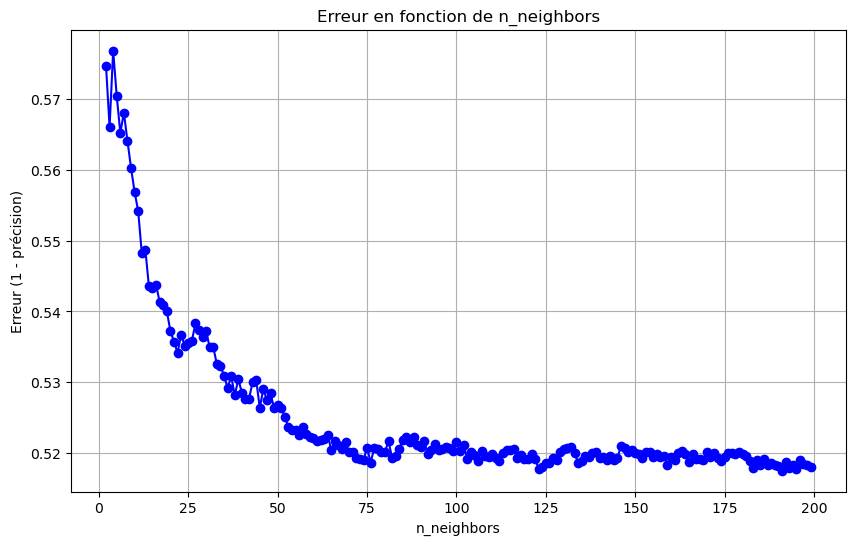

In [50]:
results = nnGrid.cv_results_
neighbors = results['param_n_neighbors'].data
mean_test_scores = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(neighbors, 1 - mean_test_scores, marker='o', linestyle='-', color='b')  # 1 - score pour l'erreur
plt.title('Erreur en fonction de n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Erreur (1 - précision)')
plt.grid(True)
plt.show()

#### Avec Greedy

In [27]:
tuned_parameters = {'n_neighbors': range(2,200)}

my_kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
nnGrid_greedy = GridSearchCV(KNeighborsClassifier(),
                      tuned_parameters,
                      cv=my_kfold,
                     n_jobs=-1)
nnGrid_greedy.fit(train_data_greedy, train_resultat)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 200)})

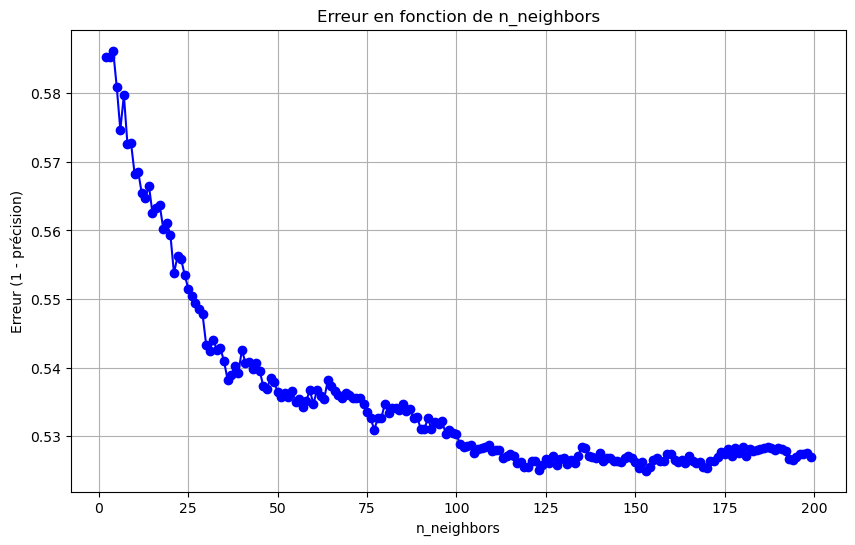

In [28]:
results = nnGrid_greedy.cv_results_
neighbors = results['param_n_neighbors'].data
mean_test_scores = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(neighbors, 1 - mean_test_scores, marker='o', linestyle='-', color='b')  # 1 - score pour l'erreur
plt.title('Erreur en fonction de n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Erreur (1 - précision)')
plt.grid(True)
plt.show()

## Bilan

Tout d'abord, la PCA se distingue du Greedy par sa rapidité d'exécution. En effet, la PCA est une méthode d'approximation qui utilise des algorithmes de factorisation de matrice pour réduire la dimensionnalité des données, ce qui permet de traiter rapidement de grandes quantités de données. En revanche, le Greedy est une méthode d'approximation qui utilise des algorithmes gloutons pour sélectionner les caractéristiques les plus importantes, ce qui peut prendre plus de temps en raison de la complexité des calculs. De plus, notre méthode Greedy n'est sûrement pas implémentée de manière optimale, ce qui peut également ralentir le processus. Enfin, on observe des meilleurs résultats en terme d'approximation de l'espace et pour la classification (de peu) avec la PCA. En effet, la PCA permet de réduire la dimensionnalité des données tout en préservant la variance, ce qui peut améliorer les performances de classification. En revanche, le Greedy peut ne pas capturer toutes les relations entre les caractéristiques, ce qui peut entraîner une perte d'information et une dégradation des performances de classification.